# Stock pricing analysis and prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM

import warnings

warnings.filterwarnings('ignore')



In [2]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [3]:
VCB = pd.read_csv('excel_vcb.csv',sep=',')
TCB = pd.read_csv('excel_tcb.csv',sep=',')
CTG = pd.read_csv('excel_ctg.csv',sep=',')

## VCB

In [4]:
VCB.shape

(3080, 7)

In [5]:
VCB.isnull().sum()

<Ticker>        0
<DTYYYYMMDD>    0
<Open>          0
<High>          0
<Low>           0
<Close>         0
<Volume>        0
dtype: int64

In [6]:
VCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <Ticker>      3080 non-null   object 
 1   <DTYYYYMMDD>  3080 non-null   int64  
 2   <Open>        3080 non-null   float64
 3   <High>        3080 non-null   float64
 4   <Low>         3080 non-null   float64
 5   <Close>       3080 non-null   float64
 6   <Volume>      3080 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 168.6+ KB


In [7]:
Cols = ['Ticker','Date','Open','High','Low','Close','Volume']

In [8]:
VCB.columns = Cols

In [9]:
VCB['Date']=pd.to_datetime(VCB['Date'], format='%Y%m%d', errors='ignore')

In [10]:
VCB = VCB.sort_values(by='Date') 
VCB.head()

,Ticker,Date,Open,High,Low,Close,Volume
3079,VCB,2009-06-30,20.9761,20.9761,20.9761,20.9761,294070
3078,VCB,2009-07-01,22.0249,22.0249,20.8013,21.1509,6248390
3077,VCB,2009-07-02,20.8013,20.9761,20.1021,20.2769,1515670
3076,VCB,2009-07-03,19.7525,19.9273,19.5777,19.5777,899720
3075,VCB,2009-07-06,19.5777,20.4517,19.5777,20.4517,1571740


In [11]:
VCB = VCB.set_index(['Date'])

In [12]:
VCB.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2009-06-30,VCB,20.9761,20.9761,20.9761,20.9761,294070
2009-07-01,VCB,22.0249,22.0249,20.8013,21.1509,6248390
2009-07-02,VCB,20.8013,20.9761,20.1021,20.2769,1515670
2009-07-03,VCB,19.7525,19.9273,19.5777,19.5777,899720
2009-07-06,VCB,19.5777,20.4517,19.5777,20.4517,1571740


In [13]:
VCB.describe()

,Open,High,Low,Close,Volume
count,3080.000000,3080.000000,3080.000000,3080.000000,3.080000e+03
mean,39.064498,39.547069,38.605253,39.091168,9.287096e+05
std,28.364358,28.684317,28.015084,28.391367,8.280543e+05
min,10.095800,10.303900,10.095800,10.095800,1.895000e+04
25%,15.777700,15.972900,15.609175,15.778200,3.571075e+05
50%,29.072650,29.555450,28.827400,29.176100,6.924950e+05
75%,59.230650,60.759325,58.915200,59.521850,1.227882e+06
max,116.700000,117.200000,115.000000,116.400000,7.265480e+06


## TCB

In [14]:
TCB.shape

(857, 7)

In [15]:
TCB.isnull().sum()

<Ticker>        0
<DTYYYYMMDD>    0
<Open>          0
<High>          0
<Low>           0
<Close>         0
<Volume>        0
dtype: int64

In [16]:
TCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <Ticker>      857 non-null    object 
 1   <DTYYYYMMDD>  857 non-null    int64  
 2   <Open>        857 non-null    float64
 3   <High>        857 non-null    float64
 4   <Low>         857 non-null    float64
 5   <Close>       857 non-null    float64
 6   <Volume>      857 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 47.0+ KB


In [17]:
TCB.columns = Cols
TCB['Date']=pd.to_datetime(TCB['Date'], format='%Y%m%d', errors='ignore')
TCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  857 non-null    object        
 1   Date    857 non-null    datetime64[ns]
 2   Open    857 non-null    float64       
 3   High    857 non-null    float64       
 4   Low     857 non-null    float64       
 5   Close   857 non-null    float64       
 6   Volume  857 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [18]:
TCB = TCB.sort_values(by='Date') 

In [19]:
TCB = TCB.set_index(['Date'])

In [20]:
TCB.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2018-06-04,TCB,34.1333,35.0000,34.1333,34.1333,2811840
2018-06-05,TCB,33.0333,35.3333,32.0000,32.0000,1357500
2018-06-06,TCB,31.6667,32.0000,30.3333,30.6667,1605480
2018-06-07,TCB,31.5000,32.8000,31.0334,32.8000,1376540
2018-06-08,TCB,33.6667,35.0667,33.1667,35.0667,2008500


## CTG

In [21]:
CTG.shape

(3070, 7)

In [22]:
CTG.isnull().sum()

<Ticker>        0
<DTYYYYMMDD>    0
<Open>          0
<High>          0
<Low>           0
<Close>         0
<Volume>        0
dtype: int64

In [23]:
CTG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070 entries, 0 to 3069
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <Ticker>      3070 non-null   object 
 1   <DTYYYYMMDD>  3070 non-null   int64  
 2   <Open>        3070 non-null   float64
 3   <High>        3070 non-null   float64
 4   <Low>         3070 non-null   float64
 5   <Close>       3070 non-null   float64
 6   <Volume>      3070 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 168.0+ KB


In [24]:
CTG.columns = Cols
CTG['Date']=pd.to_datetime(CTG['Date'], format='%Y%m%d', errors='ignore')
CTG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070 entries, 0 to 3069
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  3070 non-null   object        
 1   Date    3070 non-null   datetime64[ns]
 2   Open    3070 non-null   float64       
 3   High    3070 non-null   float64       
 4   Low     3070 non-null   float64       
 5   Close   3070 non-null   float64       
 6   Volume  3070 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 168.0+ KB


In [25]:
CTG.head()

,Ticker,Date,Open,High,Low,Close,Volume
0,CTG,2021-11-01,31.80,32.40,31.60,32.2,17976000
1,CTG,2021-10-29,31.50,31.75,31.25,31.5,13017400
2,CTG,2021-10-28,31.35,31.40,31.00,31.3,14396300
3,CTG,2021-10-27,30.20,31.20,29.95,31.1,19607500
4,CTG,2021-10-26,29.90,30.30,29.70,29.9,5963000


In [26]:
CTG = CTG.sort_values(by='Date') 

In [27]:
CTG = CTG.set_index(['Date'])

In [28]:
CTG.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2009-07-16,CTG,11.9844,13.4825,11.9844,12.0144,2401900
2009-07-17,CTG,11.5650,11.6848,11.4152,11.4152,1002480
2009-07-20,CTG,10.8459,10.8459,10.8459,10.8459,156560
2009-07-21,CTG,10.3066,10.6362,10.3066,10.4564,2133390
2009-07-22,CTG,10.6362,10.7560,10.4864,10.6062,949090


### Combine data

In [29]:
# Combine data:
stock_list = ['VCB','TCB','CTG']

company_list = [VCB,TCB,CTG]
company_name = ["Vietcombank", "Techcombank", "Vietinbank"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

df.head(10)

,Ticker,Open,High,Low,Close,Volume,company_name
Date,,,,,,,
2009-06-30,VCB,20.9761,20.9761,20.9761,20.9761,294070,Vietcombank
2009-07-01,VCB,22.0249,22.0249,20.8013,21.1509,6248390,Vietcombank
2009-07-02,VCB,20.8013,20.9761,20.1021,20.2769,1515670,Vietcombank
2009-07-03,VCB,19.7525,19.9273,19.5777,19.5777,899720,Vietcombank
2009-07-06,VCB,19.5777,20.4517,19.5777,20.4517,1571740,Vietcombank
2009-07-07,VCB,20.1021,20.2769,19.7525,19.7525,1115420,Vietcombank
2009-07-08,VCB,19.2281,19.5777,19.0533,19.4029,763030,Vietcombank
2009-07-09,VCB,19.0533,19.5777,18.7037,18.8785,982430,Vietcombank
2009-07-10,VCB,18.5289,18.7037,18.0045,18.0044,1973450,Vietcombank


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7007 entries, 2009-06-30 to 2021-11-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        7007 non-null   object 
 1   Open          7007 non-null   float64
 2   High          7007 non-null   float64
 3   Low           7007 non-null   float64
 4   Close         7007 non-null   float64
 5   Volume        7007 non-null   int64  
 6   company_name  7007 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 437.9+ KB


In [31]:
df.describe()

,Open,High,Low,Close,Volume
count,7007.000000,7007.000000,7007.000000,7007.000000,7.007000e+03
mean,27.021812,27.368066,26.692675,27.029299,2.498689e+06
std,22.812024,23.079651,22.529907,22.834028,4.432786e+06
min,6.202000,6.351800,6.172000,6.202000,1.119000e+04
25%,12.583250,12.729300,12.456200,12.583250,3.993850e+05
50%,17.263000,17.483200,17.074200,17.299700,9.331400e+05
75%,32.000000,32.316650,31.535600,31.866100,2.286040e+06
max,116.700000,117.200000,115.000000,116.400000,5.823550e+07


## Visualize data

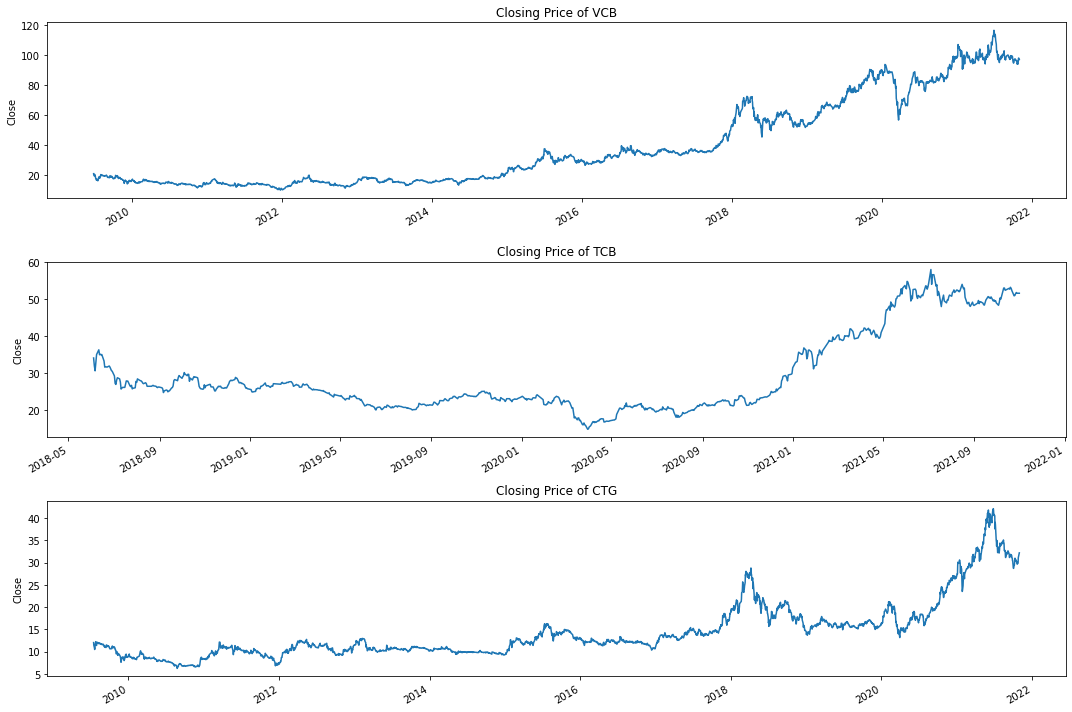

In [32]:
# Visualize the close price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

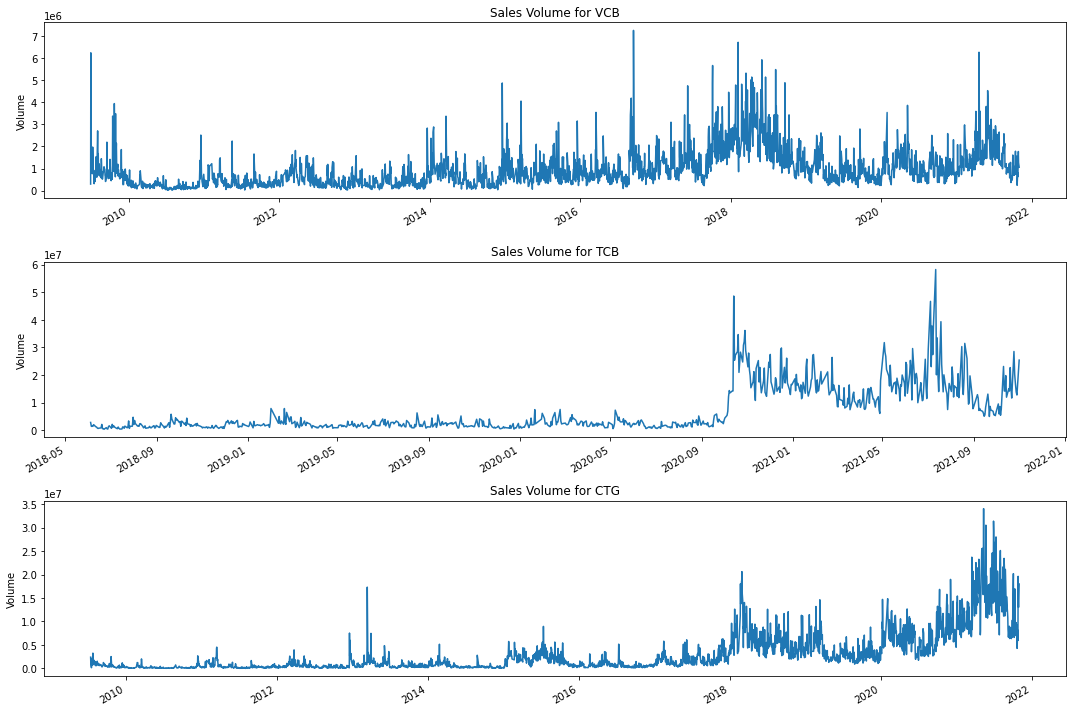

In [33]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")
    
plt.tight_layout()

## The moving average

In [34]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

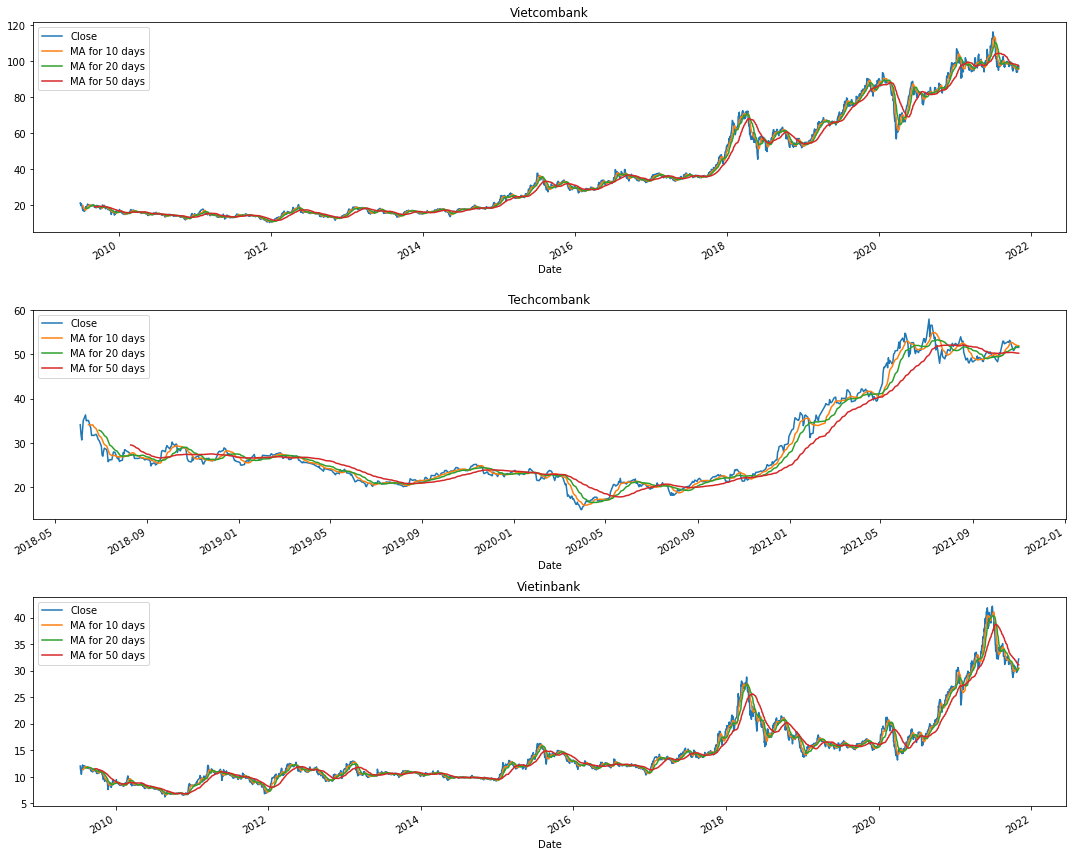

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(12)
fig.set_figwidth(15)

VCB[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('Vietcombank')

TCB[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('Techcombank')

CTG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2])
axes[2].set_title('Vietinbank')


fig.tight_layout()

## Daily return of stock on average

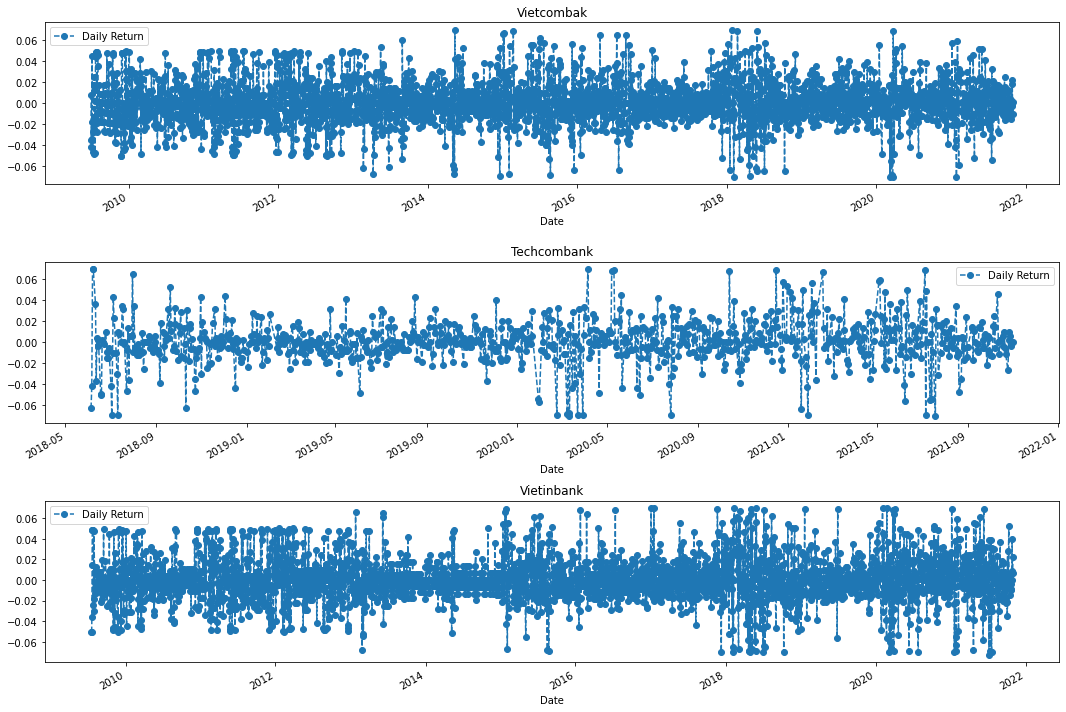

In [36]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

VCB['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('Vietcombak')

TCB['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('Techcombank')

CTG['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title('Vietinbank')

fig.tight_layout()

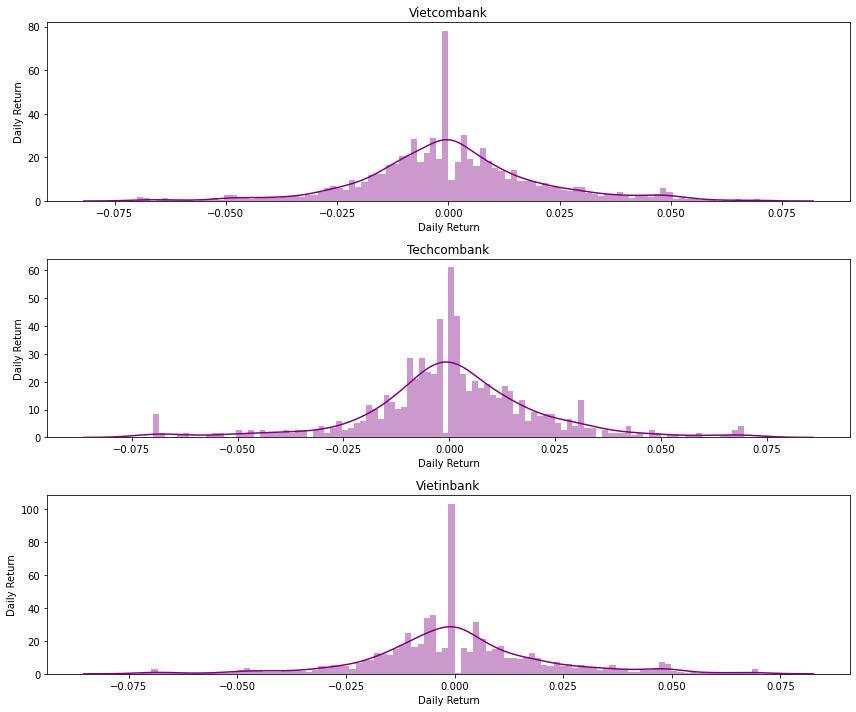

In [37]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

## The correlation between different stocks closing prices

In [38]:
VCB_cr = VCB.loc[start:end]
VCB_cr.head()

,Ticker,Open,High,Low,Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2020-11-02,VCB,82.3249,85.1021,82.3249,85.1022,366300,Vietcombank,84.96330,85.300530,83.977378,0.033736
2020-11-03,VCB,85.1022,85.2014,84.0111,84.3087,308550,Vietcombank,84.69550,85.355085,83.999200,-0.009324
2020-11-04,VCB,84.3087,84.8046,83.6144,84.3087,394660,Vietcombank,84.57648,85.355085,84.021022,0.000000
2020-11-05,VCB,84.8046,84.8046,84.1103,84.3087,507960,Vietcombank,84.41778,85.365005,84.050778,0.000000
2020-11-06,VCB,84.4079,84.4079,83.3168,84.3087,323160,Vietcombank,84.16982,85.374925,84.080534,0.000000


In [39]:
TCB_cr = TCB.loc[start:end]
TCB_cr.head()

,Ticker,Open,High,Low,Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2020-11-02,TCB,21.60,21.85,21.40,21.40,22943680,Techcombank,22.920,22.5025,22.094,0.002342
2020-11-03,TCB,21.80,22.45,21.65,22.00,27962010,Techcombank,22.730,22.4825,22.115,0.028037
2020-11-04,TCB,22.35,22.60,22.15,22.15,21927670,Techcombank,22.570,22.5000,22.132,0.006818
2020-11-05,TCB,22.15,22.35,21.80,21.80,19766660,Techcombank,22.355,22.5225,22.146,-0.015801
2020-11-06,TCB,21.90,22.00,21.50,21.60,15368880,Techcombank,22.115,22.5350,22.155,-0.009174


In [40]:
CTG_cr = CTG.loc[start:end]
CTG_cr.head()

,Ticker,Open,High,Low,Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2020-11-02,CTG,22.3809,23.2211,22.3045,23.2210,5194990,Vietinbank,23.41964,22.86203,20.951644,0.048272
2020-11-03,CTG,23.4120,23.4502,22.9918,23.0683,4957760,Vietinbank,23.27451,22.97661,21.040252,-0.006576
2020-11-04,CTG,23.1447,23.6794,22.9919,23.3738,7152600,Vietinbank,23.24013,23.11410,21.130386,0.013243
2020-11-05,CTG,23.2974,23.6030,23.1065,23.1065,5810810,Vietinbank,23.10646,23.23250,21.215174,-0.011436
2020-11-06,CTG,23.1447,23.4120,23.0683,23.1065,5382100,Vietinbank,22.98807,23.33180,21.299198,0.000000


In [41]:
closing_df = pd.DataFrame(index=VCB_cr.index)

In [42]:
closing_df['VCB']=VCB_cr['Close']
closing_df['TCB']=TCB_cr['Close']
closing_df['CTG']=CTG_cr['Close']

In [43]:
closing_df.shape

(250, 3)

In [44]:
closing_df.head()

,VCB,TCB,CTG
Date,,,
2020-11-02,85.1022,21.40,23.2210
2020-11-03,84.3087,22.00,23.0683
2020-11-04,84.3087,22.15,23.3738
2020-11-05,84.3087,21.80,23.1065
2020-11-06,84.3087,21.60,23.1065


In [45]:
stock_rets = closing_df.pct_change()
stock_rets.head()

,VCB,TCB,CTG
Date,,,
2020-11-02,NaN,NaN,NaN
2020-11-03,-0.009324,0.028037,-0.006576
2020-11-04,0.000000,0.006818,0.013243
2020-11-05,0.000000,-0.015801,-0.011436
2020-11-06,0.000000,-0.009174,0.000000


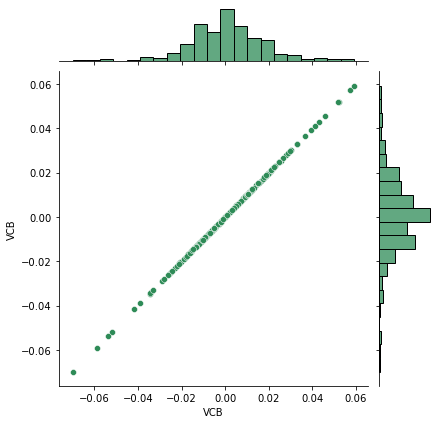

In [46]:
# Comparing Vietcombank to itself should show a perfectly linear relationship
sns.jointplot('VCB', 'VCB', stock_rets, kind='scatter', color='seagreen')

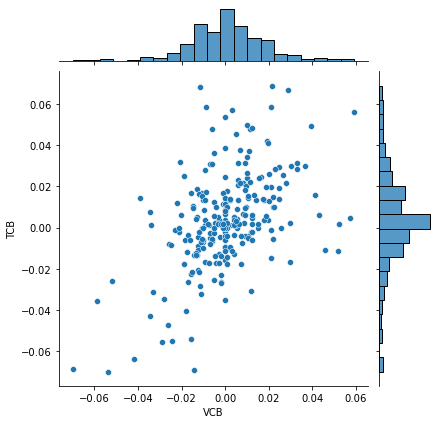

In [47]:
# We'll use joinplot to compare the daily returns of VCB and TCB
sns.jointplot('VCB', 'TCB', stock_rets, kind='scatter')

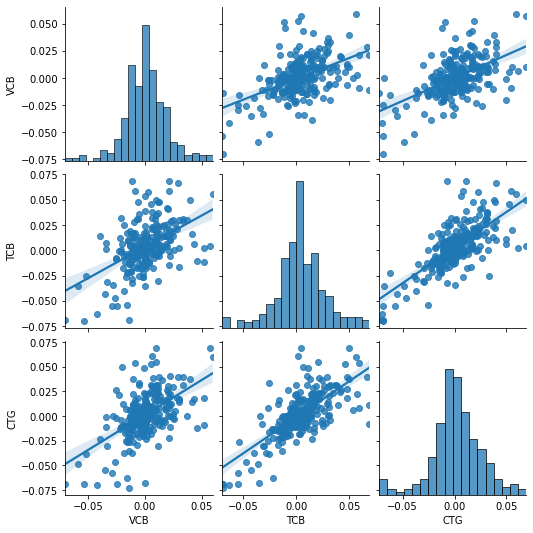

In [48]:
sns.pairplot(stock_rets, kind='reg')

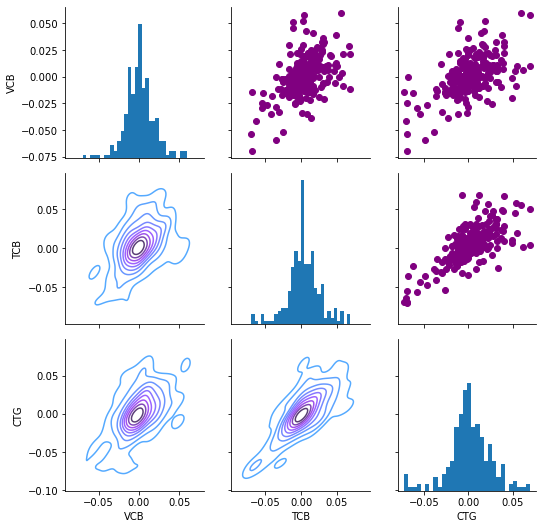

In [49]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

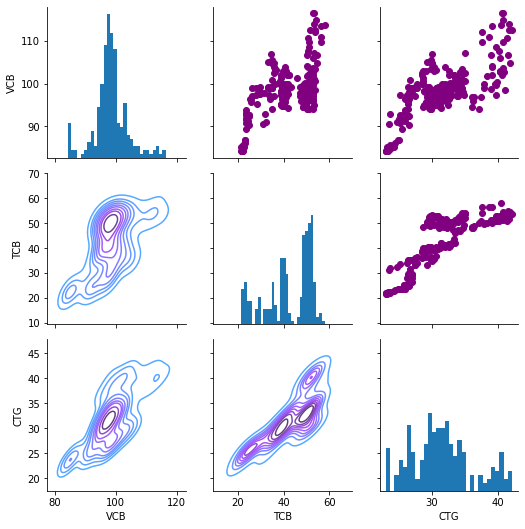

In [50]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

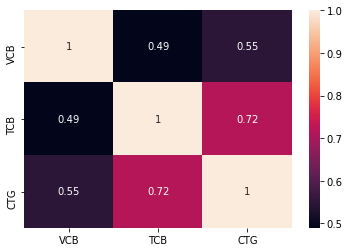

In [51]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(stock_rets.corr(), annot=True)

<AxesSubplot:>

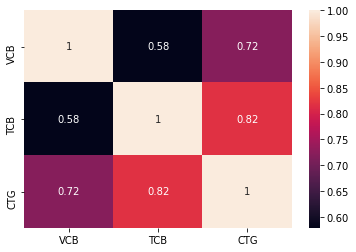

In [52]:
sns.heatmap(closing_df.corr(), annot=True)

# How much value do we put at risk by investing in a particular stock?

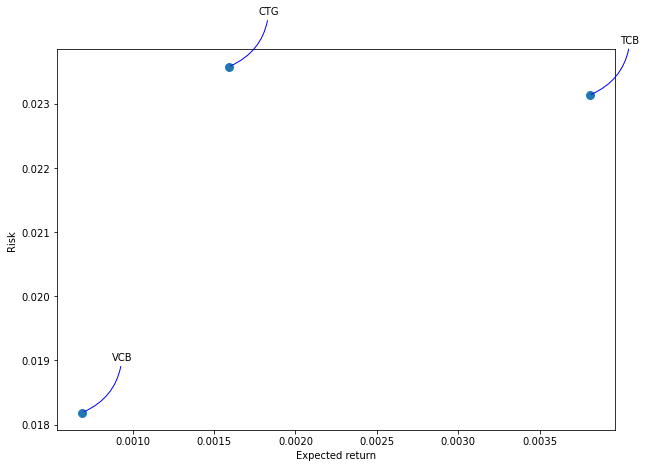

In [53]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price

## VCB

In [54]:
df_VCB = pd.read_csv('excel_vcb.csv',sep=',')
df_VCB.columns = Cols
df_VCB['Date']=pd.to_datetime(df_VCB['Date'], format='%Y%m%d', errors='ignore')
df_VCB = df_VCB.sort_values(by='Date') 
df_VCB = df_VCB.set_index(['Date'])
df_VCB.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2009-06-30,VCB,20.9761,20.9761,20.9761,20.9761,294070
2009-07-01,VCB,22.0249,22.0249,20.8013,21.1509,6248390
2009-07-02,VCB,20.8013,20.9761,20.1021,20.2769,1515670
2009-07-03,VCB,19.7525,19.9273,19.5777,19.5777,899720
2009-07-06,VCB,19.5777,20.4517,19.5777,20.4517,1571740


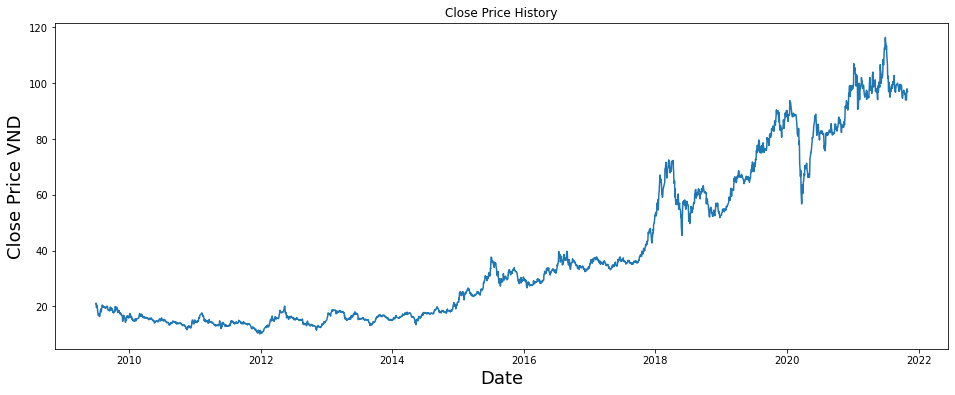

In [55]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_VCB['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND', fontsize=18)
plt.show()

In [56]:
# Create a new dataframe with only the 'Close column 
data_VCB = df_VCB.filter(['Close'])
# Convert the dataframe to a numpy array
dataset_VCB = data_VCB.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset_VCB) * .95 ))

training_data_len

2926

In [57]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_VCB = scaler.fit_transform(dataset_VCB)

scaled_data_VCB

array([[0.10235061],
       [0.10399495],
       [0.09577326],
       ...,
       [0.82597113],
       [0.82691182],
       [0.81750486]])

In [58]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data_VCB[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.10235061, 0.10399495, 0.09577326, 0.08919591, 0.0974176 ,
       0.09084025, 0.08755157, 0.08261856, 0.07439593, 0.06617424,
       0.06222802, 0.06617424, 0.06880537, 0.06650349, 0.05893935,
       0.05926859, 0.06124123, 0.06880537, 0.07604121, 0.0842629 ,
       0.07932989, 0.07768555, 0.07439593, 0.08261856, 0.09084025,
       0.0974176 , 0.09577326, 0.09248459, 0.09084025, 0.09412892,
       0.09248459, 0.09084025, 0.09248459, 0.09248459, 0.08919591,
       0.08755157, 0.08755157, 0.08755157, 0.08919591, 0.09084025,
       0.08755157, 0.08919591, 0.08919591, 0.09084025, 0.09412892,
       0.09248459, 0.08919591, 0.0842629 , 0.07932989, 0.08097422,
       0.08097422, 0.07932989, 0.07932989, 0.07932989, 0.07768555,
       0.08590724, 0.08919591, 0.09084025, 0.08590724, 0.08261856])]
[0.08426289836149464]

[array([0.10235061, 0.10399495, 0.09577326, 0.08919591, 0.0974176 ,
       0.09084025, 0.08755157, 0.08261856, 0.07439593, 0.06617424,
       0.06222802, 0.06617424, 0.06

In [59]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2866/2866 [==============================] - 43s 14ms/step - loss: 8.2553e-04


In [60]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data_VCB[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_VCB[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.3732565151452802

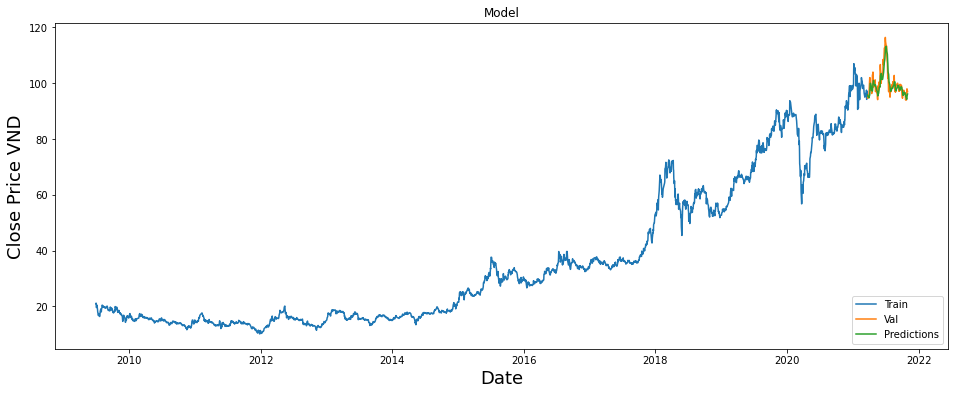

In [61]:
# Plot the data
train = data_VCB[:training_data_len]
valid = data_VCB[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model_VCB')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-03-24,94.7,95.795517
2021-03-25,95.1,95.489426
2021-03-26,94.9,95.249748
2021-03-29,95.3,95.036263
2021-03-30,94.8,94.970848
...,...,...
2021-10-26,94.0,94.454887
2021-10-27,96.1,94.212341
2021-10-28,97.9,94.519936


## TCB

In [63]:
df_TCB = pd.read_csv('excel_tcb.csv',sep=',')
df_TCB.columns = Cols
df_TCB['Date']=pd.to_datetime(df_TCB['Date'], format='%Y%m%d', errors='ignore')
df_TCB = df_TCB.sort_values(by='Date') 
df_TCB = df_TCB.set_index(['Date'])
df_TCB.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2018-06-04,TCB,34.1333,35.0000,34.1333,34.1333,2811840
2018-06-05,TCB,33.0333,35.3333,32.0000,32.0000,1357500
2018-06-06,TCB,31.6667,32.0000,30.3333,30.6667,1605480
2018-06-07,TCB,31.5000,32.8000,31.0334,32.8000,1376540
2018-06-08,TCB,33.6667,35.0667,33.1667,35.0667,2008500


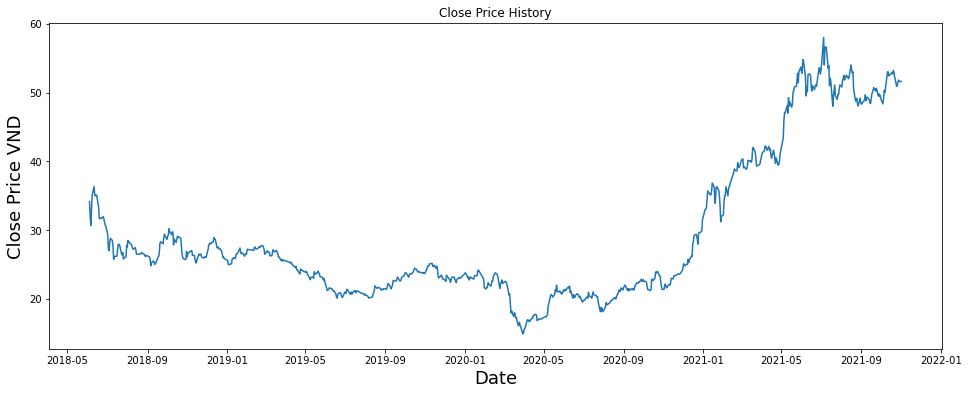

In [64]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_TCB['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND', fontsize=18)
plt.show()

In [65]:
# Create a new dataframe with only the 'Close column 
data_TCB = df_TCB.filter(['Close'])
# Convert the dataframe to a numpy array
dataset_TCB = data_TCB.values
# Get the number of rows to train the model on
training_data_len_TCB = int(np.ceil( len(dataset_TCB) * .95 ))

training_data_len_TCB

815

In [66]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_TCB = scaler.fit_transform(dataset_TCB)

scaled_data_TCB

array([[0.44624826],
       [0.39675174],
       [0.36581671],
       [0.41531323],
       [0.46790487],
       [0.49729234],
       [0.46635731],
       [0.46945012],
       [0.46635731],
       [0.46790487],
       [0.42768677],
       [0.38901856],
       [0.39056381],
       [0.39056381],
       [0.38901856],
       [0.39597912],
       [0.38901856],
       [0.37819026],
       [0.36736195],
       [0.36349652],
       [0.33410673],
       [0.28693039],
       [0.28074246],
       [0.30742459],
       [0.3225058 ],
       [0.31554524],
       [0.29582367],
       [0.25174014],
       [0.2575406 ],
       [0.26218097],
       [0.26218097],
       [0.28306265],
       [0.30278422],
       [0.30162413],
       [0.30162413],
       [0.27146172],
       [0.26682135],
       [0.274942  ],
       [0.25290023],
       [0.25638051],
       [0.25986079],
       [0.29930394],
       [0.29350348],
       [0.31554524],
       [0.31206497],
       [0.30394432],
       [0.30278422],
       [0.298

In [67]:
# Create the training data set 
# Create the scaled training data set
train_data_TCB = scaled_data_TCB[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_TCB)):
    x_train.append(train_data_TCB[i-60:i, 0])
    y_train.append(train_data_TCB[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.44624826, 0.39675174, 0.36581671, 0.41531323, 0.46790487,
       0.49729234, 0.46635731, 0.46945012, 0.46635731, 0.46790487,
       0.42768677, 0.38901856, 0.39056381, 0.39056381, 0.38901856,
       0.39597912, 0.38901856, 0.37819026, 0.36736195, 0.36349652,
       0.33410673, 0.28693039, 0.28074246, 0.30742459, 0.3225058 ,
       0.31554524, 0.29582367, 0.25174014, 0.2575406 , 0.26218097,
       0.26218097, 0.28306265, 0.30278422, 0.30162413, 0.30162413,
       0.27146172, 0.26682135, 0.274942  , 0.25290023, 0.25638051,
       0.25986079, 0.29930394, 0.29350348, 0.31554524, 0.31206497,
       0.30394432, 0.30278422, 0.29814385, 0.2900232 , 0.28538283,
       0.29118329, 0.28538283, 0.26914153, 0.26914153, 0.26914153,
       0.26914153, 0.26914153, 0.27262181, 0.274942  , 0.27146172])]
[0.26914153132250573]

[array([0.44624826, 0.39675174, 0.36581671, 0.41531323, 0.46790487,
       0.49729234, 0.46635731, 0.46945012, 0.46635731, 0.46790487,
       0.42768677, 0.38901856, 0.39

In [68]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

797/797 [==============================] - 14s 15ms/step - loss: 0.0031


In [69]:
# Create the testing data set
# Create a new array containing scaled values from index ... to ....
test_data_TCB = scaled_data_TCB[training_data_len_TCB - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_TCB[training_data_len_TCB:, :]
for i in range(60, len(test_data_TCB)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.0164511870827257

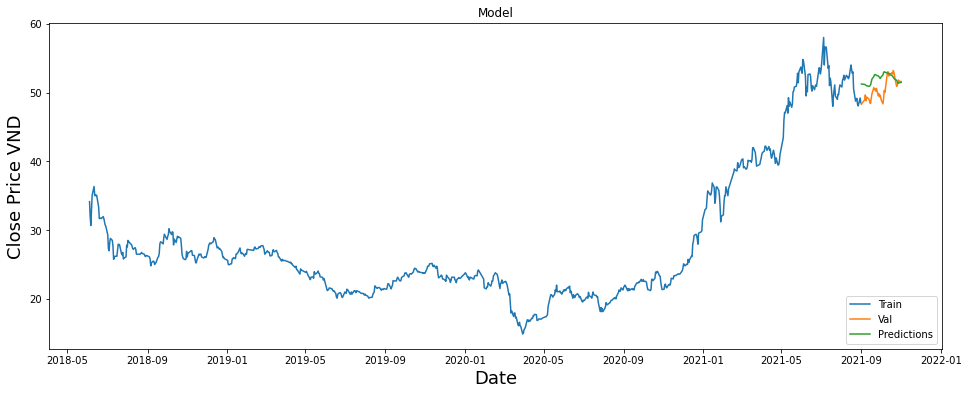

In [70]:
# Plot the data
train = data_TCB[:training_data_len_TCB]
valid = data_TCB[training_data_len_TCB:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model_TCB')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [71]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-01,48.30,51.235893
2021-09-06,48.95,51.175743
2021-09-07,49.65,51.112049
2021-09-08,48.80,51.043354
2021-09-09,49.30,50.999969
2021-09-10,49.30,50.949669
2021-09-13,48.95,50.902920
2021-09-14,48.50,50.964523
2021-09-15,48.40,51.112648


## CTG

In [72]:
df_CTG = pd.read_csv('excel_ctg.csv',sep=',')
df_CTG.columns = Cols
df_CTG['Date']=pd.to_datetime(df_CTG['Date'], format='%Y%m%d', errors='ignore')
df_CTG = df_CTG.sort_values(by='Date') 
df_CTG = df_CTG.set_index(['Date'])
df_CTG.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2009-07-16,CTG,11.9844,13.4825,11.9844,12.0144,2401900
2009-07-17,CTG,11.5650,11.6848,11.4152,11.4152,1002480
2009-07-20,CTG,10.8459,10.8459,10.8459,10.8459,156560
2009-07-21,CTG,10.3066,10.6362,10.3066,10.4564,2133390
2009-07-22,CTG,10.6362,10.7560,10.4864,10.6062,949090


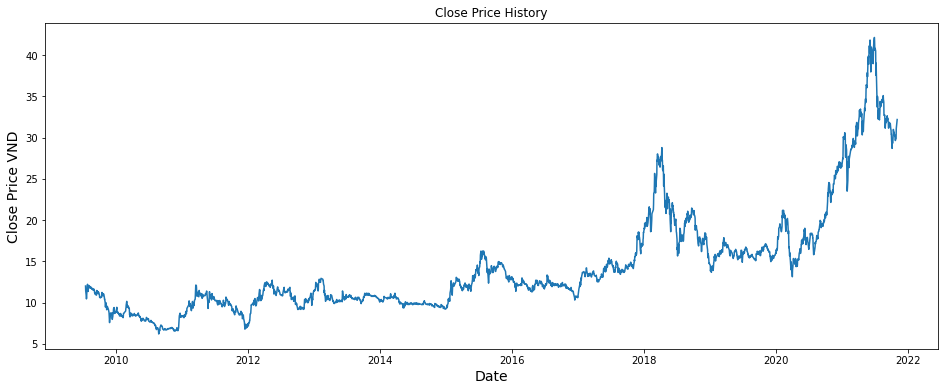

In [73]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_CTG['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price VND', fontsize=14)
plt.show()

In [74]:
# Create a new dataframe with only the 'Close column 
data_CTG = df_CTG.filter(['Close'])
# Convert the dataframe to a numpy array
dataset_CTG = data_CTG.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset_CTG) * .95 ))

training_data_len

2917

In [75]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_CTG = scaler.fit_transform(dataset_CTG)

scaled_data_CTG

array([[0.16169945],
       [0.14502986],
       [0.12919209],
       ...,
       [0.69821981],
       [0.70378376],
       [0.72325758]])

In [76]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data_CTG[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.16169945, 0.14502986, 0.12919209, 0.1183563 , 0.1225237 ,
       0.13669507, 0.15169826, 0.16753603, 0.15919846, 0.14919726,
       0.14336346, 0.15836665, 0.16086764, 0.16336585, 0.16086764,
       0.15670025, 0.15586565, 0.16003305, 0.15586565, 0.15419925,
       0.15586565, 0.15836665, 0.15670025, 0.15336466, 0.15336466,
       0.15086366, 0.15336466, 0.15336466, 0.15086366, 0.14919726,
       0.14753086, 0.14919726, 0.15169826, 0.15003185, 0.14669627,
       0.14002788, 0.13419408, 0.14002788, 0.13836147, 0.13419408,
       0.13252767, 0.13086127, 0.13169308, 0.14669627, 0.14419527,
       0.14419527, 0.14336346, 0.13919607, 0.13919607, 0.13586048,
       0.14169706, 0.13836147, 0.13586048, 0.13419408, 0.13086127,
       0.12335829, 0.1225237 , 0.12169189, 0.1225237 , 0.1225237 ])]
[0.12335828763941165]

[array([0.16169945, 0.14502986, 0.12919209, 0.1183563 , 0.1225237 ,
       0.13669507, 0.15169826, 0.16753603, 0.15919846, 0.14919726,
       0.14336346, 0.15836665, 0.16

In [77]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2857/2857 [==============================] - 45s 15ms/step - loss: 6.9759e-04


In [78]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data_CTG[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_CTG[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.163068347724619

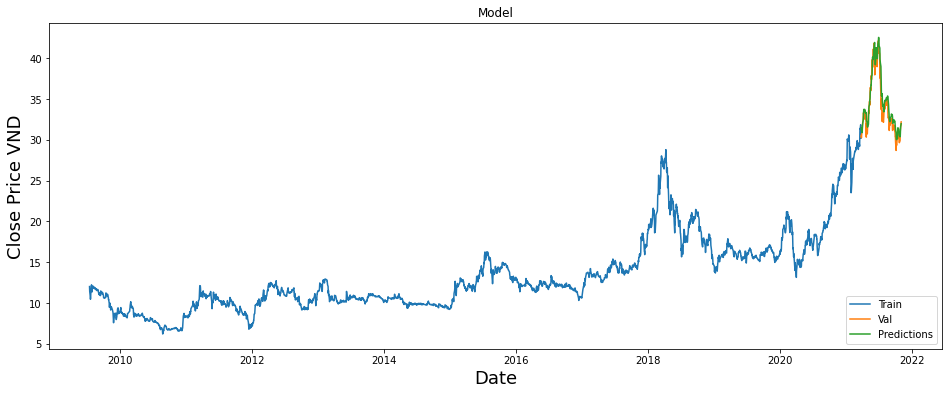

In [79]:
# Plot the data
train = data_CTG[:training_data_len]
valid = data_CTG[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [80]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-03-25,30.5261,31.503355
2021-03-26,30.2549,31.136482
2021-03-29,30.9909,30.879406
2021-03-30,31.3008,31.100544
2021-03-31,31.1072,31.497633
...,...,...
2021-10-26,29.9000,30.411728
2021-10-27,31.1000,30.489456
2021-10-28,31.3000,31.064348
